Notebook for fitting the runtimes from the resource estimates.

Cambridge Consultants 2024\
Walden Killick

In [16]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [17]:
# Data from the resource estimator
x_matrix_sizes = [4, 8, 16, 32, 64, 128, 256]
y_runtimes = [0.106, 0.209, 0.590, 1, 4, 8,  15]

In [18]:
a_linear, b_linear = np.polyfit(x_matrix_sizes, y_runtimes, 1)
print(f"Runtime fit: {a_linear}*x + {b_linear}")

Runtime fit: 0.06069840030772014*x + -0.27568390804597964


In [19]:
def polylog(t,a,b,c,d):
    return a*np.log(t)**3 + b*np.log(t)**2 + c*np.log(t) + d

popt, pcov = scipy.optimize.curve_fit(
    lambda t,a,b,c,d: polylog(t,a,b,c,d),  x_matrix_sizes,  y_runtimes,  p0=(0.1,0,0,-1)
    )
print(f"Polylog fit: {popt[0]}*log(x)^3 + {popt[1]}*log(x)^2 + {popt[2]}*log(x) + {popt[3]}")

Polylog fit: 0.30803527840088796*log(x)^3 + -1.771517817276902*log(x)^2 + 3.424306187979826*log(x) + -2.033572179167546


In [20]:
x = np.linspace(4, 256, 100)
y_runtimes_fit_linear = [a_linear*t + b_linear for t in x]
y_polylog_fit = [popt[0]*np.log(t)**3 + popt[1]*np.log(t)**2 + popt[2]*np.log(t) + popt[3] for t in x]

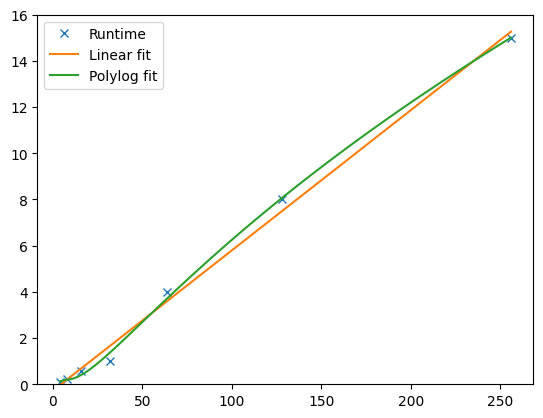

In [21]:
plt.plot(x_matrix_sizes, y_runtimes, 'x', label='Runtime')
plt.plot(x, y_runtimes_fit_linear, label='Linear fit')
plt.plot(x, y_polylog_fit, label='Polylog fit')
plt.ylim([0, 16])
plt.legend()
plt.show()

In [22]:
polylog(10e100, popt[0], popt[1], popt[2], popt[3])

3779446.520268218